Health claim amounts and the GB family of distributions (5 points).
For this problem, you will use 10,619 health claims amounts from a ctitious
sample of households. These data are in a single column of the text le clms.txt
in the PS2 folder. Health claim amounts are reported in U.S. dollars. For this
exercise, you will need to use the generalized beta family of distributions shown
in the gure in Section 7 of your MLE Jupyter notebook.
(a) (0.5 points) Calculate and report the mean, median, maximum, minimum,
and standard deviation of monthly health expenditures for these data.
Plot two histograms of the data in which the y-axis gives the percent
of observations in the particular bin of health expenditures and the x-axis
gives the value of monthly health expenditures. Use percentage histograms
in which the height of each bar is the percent of observations in that bin (see
instructions in Jupyter notebook PythonVisualize.ipynb in Section 1.2).
In the rst histogram, use 1,000 bins to plot the frequency of all the data.
In the second histogram, use 100 bins to plot the frequency of only monthly
health expenditures less-than-or-equal-to $800 (xi  800). Adjust the
frequencies of this second histogram to account for the observations that
you have not displayed (xi > 800). That is, the heights of the histogram
bars in the second histogram should not sum to 1 because you are only
displaying a fraction of the data. Comparing the two histograms, why
might you prefer the second one?

# Question 1

### Part a

In [1]:
# Import the necessary libraries
import numpy as np
import scipy.stats as sts
import requests
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import math
import statistics


In [6]:
pts = np.loadtxt('clms.txt')


In [7]:
# Calculate simple metrics
print("Mean:", np.mean(pts))
print("Median:", np.median(pts))
print("Max:", np.max(pts))
print("Min:", np.min(pts))
print("Standard Deviation:", statistics.stdev(pts)) # we are going to assume sample standard deviation

Mean: 720.2779753272437
Median: 172.21
Max: 227967.25
Min: 0.01
Standard Deviation: 3972.850824119446


1.0000000000000322


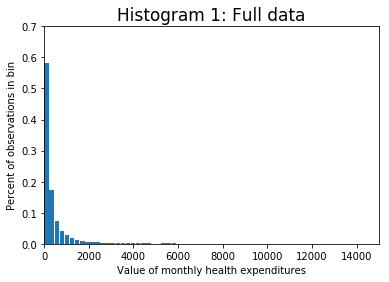

In [8]:
plt.clf()
plt.cla()
plt.close()
num_bins = 1000
#pts.shape is number of observations
weights = (1 / pts.shape[0]) * np.ones_like(pts)

count, num_bins, patches = plt.hist(pts, num_bins, weights=weights, rwidth = 0.9)
plt.title('Histogram 1: Full data', fontsize=17)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 15000])  # This gives the xmin and xmax to be plotted"count, bins, ignored = plt.hist(pts, num_bins, density=True,
plt.ylim([0, 0.7])  # This gives the ymin and ymax to be plotted
# plt.show()
#verify the columns sum to 1
print(count.sum())

0.8494208494208465


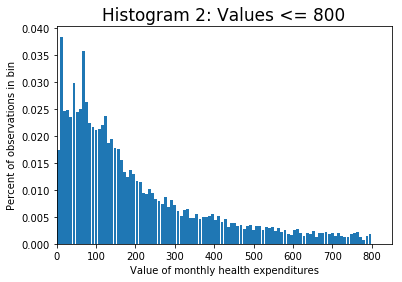

In [9]:
plt.clf()
plt.cla()
plt.close()
#subset data
subset_800 = pts[pts <= 800]
num_bins = 100
weights = (1 / pts.shape[0]) * np.ones_like(subset_800)
count, num_bins, patches = plt.hist(subset_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Histogram 2: Values <= 800', fontsize=17)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 850])

#Verify the columns do not sum to 1, as the data is subsetted
print(count.sum())


Why might we prefer the second histogram?
Notice that the sum of counts has reduced to about 15%, which means the values that we cut off (>800) did not account for a lot of data. That is why the tail in the first histogram is so long.
The second histogram is more informative in terms of seeing the distribution of the data.

### part b

Another two-parameter distribution with strictly positive support is the gamma (GA) distribution. The pdf of the gamma distribution is the following.

$$ \text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}},\quad x\in[0,\infty), \:\alpha,\beta>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$


In [10]:
# Define function that generates values of gamma pdf
import scipy.special as spc

def gamma_pdf(xvals, alpha, beta):
    gamma_val = spc.gamma(alpha)
    pdf_vals = (1/((beta**alpha) *gamma_val))*(xvals**(alpha-1))*(np.exp(-(xvals/beta)))

    return pdf_vals

In [11]:
def log_lik_gamma(xvals, alpha, beta):
    pdf_vals = gamma_pdf(xvals, alpha, beta)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [12]:
def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [1]:
import scipy.optimize as opt
sigma = statistics.stdev(pts)
beta_0 = sigma**2/(np.mean(pts))
alpha_0 = (np.mean(pts))/beta_0
print('initial alpha: ',alpha_0)
print('initial beta: ',beta_0)
params_init = np.array([alpha_0, beta_0])
mle_args = pts
#drop xvals <= 0 if the following is satisfied
if (alpha_0 < 1 and alpha_0 > 0):
    subset_pts_0 = pts[pts > 0]
else:
    subset_pts_0 = pts
mle_args = subset_pts_0

results_uncstr = opt.minimize(crit, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None)), tol=1e-12)
alpha_GA_MLE, beta_GA_MLE = results_uncstr.x
print('alpha_GA_MLE=', alpha_GA_MLE, ' beta_GA_MLE=', beta_GA_MLE)

NameError: name 'statistics' is not defined

In [14]:
print('Log-likelihood for GA: ', log_lik_gamma(pts, alpha_GA_MLE, beta_GA_MLE))

Log-likelihood for GA:  -77001.36878468955


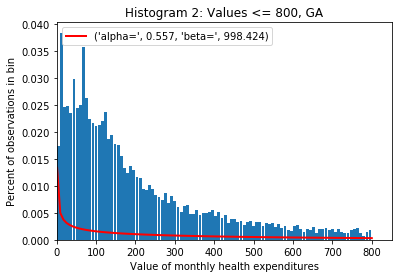

In [15]:
# Plot two different truncated normal distributions on top of the
# histogram of the data
subset_800 = pts[pts <= 800]
num_bins = 100
weights = (1 / pts.shape[0]) * np.ones_like(subset_800)
count, num_bins, patches = plt.hist(subset_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Histogram 2: Values <= 800, GA', fontsize=12)
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 850])

# Plot smooth line with distribution solved for above
dist_pts = np.linspace(1, 800, 100) #not sure this is right
# dist_pts = np.random.gamma(0, 100, 100)
alpha_GA_round = round(alpha_GA_MLE,3)
beta_GA_round = round(beta_GA_MLE,3)

plt.plot(dist_pts, gamma_pdf(dist_pts, alpha_GA_MLE, beta_GA_MLE),
         linewidth=2, color='r', label=('alpha=' ,alpha_GA_round,'beta=',beta_GA_round))
plt.legend(loc='upper left')


# 1c

Another two-parameter distribution with strictly positive support is the gamma (GA) distribution. The pdf of the gamma distribution is the following.

$$ \text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}},\quad x\in[0,\infty), \:\alpha,\beta>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$

The gamma function $\Gamma(\cdot)$ within the gamma (GA) distribution is a common function that has a preprogrammed function in most programming languages.

The lognormal (LN) and gamma (GA) distributions are both two-parameter distributions and are both special cases of the three-parameter generalized gamma (GG) distribution. The pdf of the generalized gamma distribution is the following.

$$ \text{(GG):}\quad f(x;\alpha,\beta,m) = \frac{m}{\beta^\alpha \Gamma\left(\frac{\alpha}{m}\right)}x^{\alpha-1}e^{-\left(\frac{x}{\beta}\right)^m},\quad x\in[0,\infty), \:\alpha,\beta,m>0 $$
$$ \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt $$

In [16]:
def generalized_gamma_pdf(xvals, alpha, beta, m):
    #pdf_vals = (1/((beta**alpha) *math.gamma(alpha)))*(xvals**(alpha-1))*(np.exp(-(xvals/beta)))
    gamma_val = spc.gamma(alpha/m)
    pdf_vals = (m/((beta**alpha) *gamma_val))*(xvals**(alpha-1))*(np.exp(-((xvals/beta)**m)))
    return pdf_vals

In [17]:
def log_lik_gen_gamma(xvals, alpha, beta, m):
    pdf_vals = generalized_gamma_pdf(xvals, alpha, beta, m)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [18]:
def gen_gamma_crit(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gen_gamma(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [19]:
m_0 = 1
mle_args = pts

params_init = np.array([alpha_GA_MLE, beta_GA_MLE, m_0])
results_uncstr = opt.minimize(gen_gamma_crit, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None), (1e-10, None)),tol=1e-12)
alpha_GG_MLE, beta_GG_MLE, m_GG_MLE = results_uncstr.x
print('alpha_GG_MLE=', alpha_GG_MLE, ' beta_GG_MLE=', beta_GG_MLE, ' m_GG_MLE=', m_GG_MLE)



alpha_GG_MLE= 1.201863829651293  beta_GG_MLE= 6.125170836345546  m_GG_MLE= 0.337753516697089


In [20]:
print('Log-likelihood for GG: ', log_lik_gen_gamma(pts, alpha_GG_MLE, beta_GG_MLE, m_GG_MLE))

Log-likelihood for GG:  -75295.2588187889


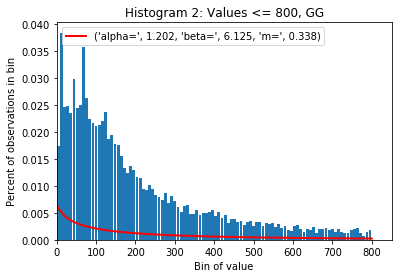

In [21]:
subset_800 = pts[pts <= 800]
num_bins = 100
weights = (1 / pts.shape[0]) * np.ones_like(subset_800)
count, num_bins, patches = plt.hist(subset_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Histogram 2: Values <= 800, GG', fontsize=12)
plt.xlabel(r'Bin of value')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 850])

# Plot smooth line with distribution solved for above
dist_pts = np.linspace(1, 800, 100) #not sure this is right
# dist_pts = np.random.gamma(0, 100, 100)
alpha_GG_round = round(alpha_GG_MLE,3)
beta_GG_round = round(beta_GG_MLE,3)
m_GG_round = round(m_GG_MLE,3)

plt.plot(dist_pts, generalized_gamma_pdf(dist_pts, alpha_GG_MLE, beta_GG_MLE, m_GG_MLE),
         linewidth=2, color='r', label=('alpha=' ,alpha_GG_round,'beta=',beta_GG_round, 'm=',m_GG_round))
plt.legend(loc='upper left')


# 1d

$$ \text{(GB2):}\quad f(x;a,b,p,q) = \frac{a x^{ap-1}}{b^{ap}B(p,q)\left(1 + \left(\frac{x}{b}\right)^a\right)^{p+q}},\quad x\in[0,\infty), \:a,b,p,q>0 $$
$$ \quad\text{where}\quad B(v,w)\equiv\int_0^1 t^{v-1}(1-t)^{w-1}dt $$

The beta function $B(\cdot,\cdot)$ within the GB2 distribution is a common function that has a preprogrammed function in most programming languages. The three-parameter generalized gamma (GG) distribution is a nested case of the four-parameter generalized beta 2 (GB2) distribution as $q$ goes to $\infty$ and for $a=m$, $b=q^{1/m}\beta$, and $p=\frac{\alpha}{m}$. See McDonald (1984, p. 662) for a derivation.

$$ GG(\alpha,\beta,m) = \lim_{q\rightarrow\infty}GB2\left(a=m,b=q^{1/m}\beta,p=\frac{\alpha}{m},q\right) $$


In [22]:
def generalized_beta_2_pdf(xvals, a, b, p, q):
    #pdf_vals = (1/((beta**alpha) *math.gamma(alpha)))*(xvals**(alpha-1))*(np.exp(-(xvals/beta)))
    beta_val = spc.beta(p,q)
    pdf_vals = (a*(xvals**(a*p - 1)))/((b**(a*p))*beta_val*
                                  (1+(xvals/b)**a)**(p+q))

    return pdf_vals

In [23]:
def log_lik_gen_beta_2(xvals, alpha, beta, p, q):
    pdf_vals = generalized_beta_2_pdf(xvals, alpha, beta, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [24]:
def gen_beta_2_crit(params, *args):
    alpha, beta, p, q = params
    xvals = args
    log_lik_val = log_lik_gen_beta_2(xvals, alpha, beta, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [25]:
q_0 = 10000
alpha_init_GG = m_GG_MLE
beta_init_GG = q_0**(1/m_GG_MLE)*beta_GG_MLE
p_init = alpha_GG_MLE/m_GG_MLE
params_init = np.array([alpha_init_GG, beta_init_GG, p_init, q_0])
results_uncstr = opt.minimize(gen_beta_2_crit, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None), (None, None), (None,None)),tol=1e-12)
alpha_GB2_MLE, beta_GB2_MLE, p_GB2_MLE, q_GB2_MLE = results_uncstr.x
print('alpha_GB2_MLE=', alpha_GB2_MLE, ' beta_GB2_MLE=', beta_GB2_MLE,
      ' p_GB2_MLE=', p_GB2_MLE, 'q_GP2_MLE=', q_GB2_MLE)


alpha_GB2_MLE= 0.33846272072182587  beta_GB2_MLE= 4266523049842.794  p_GB2_MLE= 3.5585731869884434 q_GP2_MLE= 9991.33886619025


In [26]:
print('Log-likelihood for GB2: ', log_lik_gen_beta_2(pts, alpha_GB2_MLE, beta_GB2_MLE, p_GB2_MLE, q_GB2_MLE))

Log-likelihood for GB2:  -75326.55542814193


NameError: name 'm_GB2_MLE' is not defined

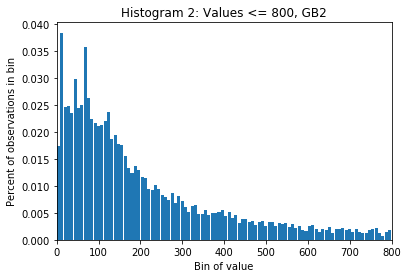

In [27]:
subset_800 = pts[pts <= 800]
num_bins = 100
weights = (1 / pts.shape[0]) * np.ones_like(subset_800)
count, num_bins, patches = plt.hist(subset_800,  num_bins, weights=weights, rwidth = 0.9)
plt.title('Histogram 2: Values <= 800, GB2', fontsize=12)
plt.xlabel(r'Bin of value')
plt.ylabel(r'Percent of observations in bin')
plt.xlim([0, 800])

# Plot smooth line with distribution solved for above
dist_pts = np.linspace(1, 800, 100) #not sure this is right
# dist_pts = np.random.gamma(0, 100, 100)
alpha_GB2_round = round(alpha_GB2_MLE,3)
beta_GB2_round = round(beta_GB2_MLE,3)
p_GB2_round = round(p_GB2_MLE,3)
q_GB2_round = round(q_GB2_MLE, 3)

plt.plot(dist_pts, generalized_beta_2_pdf(dist_pts, alpha_GB2_MLE, beta_GB2_MLE, m_GB2_MLE, q_GB2_MLE),
         linewidth=2, color='r', label=('alpha=' ,alpha_GB2_round,'beta=',beta_GB2_round,
                                        'p=',p_GB2_round, 'q=',q_GB2_round))
plt.legend(loc='upper left')


# 1e

In [ ]:
# b vs. d
log_lik_GA = log_lik_gamma(pts, alpha_GA_MLE, beta_GA_MLE)
print('MLE log likelihood in (b)', log_lik_GA)
log_lik_beta = log_lik_gen_beta_2(pts, alpha_GB2_MLE, beta_GB2_MLE, m_GB2_MLE, q_GB2_MLE)
print('MLE log likelihood in (d)', log_lik_beta)
LR_val = 2 * (log_lik_beta - log_lik_GA)
print('likelihood ratio value', LR_val)
pval_GA = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_GA)

In [ ]:
# c vs. d
log_lik_GG = log_lik_gen_gamma(pts, alpha_GG_MLE, beta_GG_MLE, m_GG_MLE)
print('MLE log likelihood in (c)', log_lik_GG)
log_lik_beta = log_lik_gen_beta_2(pts, alpha_GB2_MLE, beta_GB2_MLE, p_GB2_MLE, q_GB2_MLE)
print('MLE log likelihood in (d)', log_lik_beta)
LR_val = 2 * (log_lik_beta - log_lik_GG)
print('likelihood ratio value', LR_val)
pval_GG = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_GG)

# 1f

In [ ]:
import scipy.integrate as integrate
#For GB2
pr_less_1000_gb2 = integrate.quad(generalized_beta_2_pdf, 0.001, 1000,args=(alpha_GB2_MLE, beta_GB2_MLE, m_GB2_MLE, q_GB2_MLE))
pr_great_eq_1000_gb2 = 1 - pr_less_1000_gb2[0]
pr_eq_1000_gb2 = generalized_beta_2_pdf(1000, alpha_GB2_MLE,beta_GB2_MLE, m_GB2_MLE, q_GB2_MLE)
pr_great_1000_gb2 = pr_great_eq_1000_gb2 - pr_eq_1000_gb2
print('Probability of having claims greater than $1000, using GB2:', round(pr_great_1000_gb2, 4)*100, "%")

#For GA
pr_less_1000_ga = integrate.quad(gamma_pdf, 0.001, 1000,args=(alpha_GA_MLE, beta_GA_MLE))
pr_great_eq_1000_ga = 1 - pr_less_1000_ga[0]
pr_eq_1000_ga = gamma_pdf(1000, alpha_GA_MLE,beta_GA_MLE)
pr_great_1000_ga = pr_great_eq_1000_ga - pr_eq_1000_ga
print('Probability of having claims greater than $1000, using GA:', round(pr_great_1000_ga, 4)*100, "%")


# 2

In [2]:
#Turn into dataframe for readability
# macro_data = np.loadtxt('MacroSeries.txt',delimiter=",")
macro_df = pd.read_csv('MacroSeries.txt',delimiter=",", header = None)
macro_df.columns = ["c_t", "k_t", "w_t", "r_t"]
macro_df.head()

#macro_data
#100 rows by 4 columns
#ct | kt | wt | rt

,c_t,k_t,w_t,r_t
0,1.067109e+07,8.040697e+06,1.059438e+07,0.954120
1,1.169487e+07,7.595072e+06,1.161079e+07,1.107009
2,9.292394e+06,8.323735e+06,9.225588e+06,0.802596
3,7.913165e+06,6.613792e+06,7.856274e+06,0.860176
4,8.140994e+06,5.632136e+06,8.082466e+06,1.039183


### 2a

$$ Pr(x|\theta) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$


In [3]:
#generate normal pdf
def normal_pdf(xvals, e_mu, e_sigma):
    e_mu = 0
    pdf_vals= (1/(e_sigma*np.sqrt(2*np.pi)))*np.exp((-((xvals-e_mu)**2)/(2*e_sigma**2)))
    return pdf_vals


In [4]:
# Define log likelihood function for the normal distribution
def log_lik_normal(xvals, e_mu, e_sigma):
    e_mu = 0
    pdf_vals = normal_pdf(xvals, e_mu, e_sigma)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [5]:
def normal_crit_2a(params, *data):
    alpha, row, mu, sigma = params
    c_t, k_t, w_t, r_t = data
    macro_df['z_t_2a'] = np.log((w_t/(1-alpha))*(k_t)**(-alpha))
    #now create z_t_lag (z_(t - 1) column in macro_df)
    macro_df['z_t_lag_2a'] = macro_df.z_t_2a.shift(1)
    #Drop nas
    macro_df.loc[0, 'z_t_lag_2a'] = macro_df.z_t_lag_2a[macro_df.z_t_lag_2a.notnull()].values[0]
    
    
    z_t_2a = macro_df.z_t_2a.values
    z_t_lag_2a = macro_df.z_t_lag_2a.values
    
    e_t_2a = z_t_2a - (row*z_t_lag_2a) - (1-row)*mu
    log_lik_val = log_lik_normal(e_t_2a, e_mu=0, e_sigma=sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [42]:
import scipy.optimize as opt


# Can't find a good initial guess

# #rick's answers commented
# alpha_init =  .7
# row_init = .48
# mu_init = .57
# sigma_init = .09

#my guesses
# alpha_init = 0.24
# row_init = 0.7
# mu_init = .2
# sigma_init = 1

alpha_init = 0.6
row_init = .6
mu_init = .5
sigma_init = .7

params_init = np.array([alpha_init, row_init, mu_init, sigma_init])
mle_args = macro_df.c_t.values, macro_df.k_t.values, macro_df.w_t.values, macro_df.r_t.values
# results_a = opt.minimize(normal_crit_2a, params_init, args=(mle_args), method = 'L-BFGS-B',
#                       bounds = ((1e-10,1 - 1e-10), (-1 + 1e-10,1 - 1e-10), (1e-10, None), (1e-10, None)))
results_a = opt.minimize(normal_crit_2a, params_init, args=(mle_args), method = 'L-BFGS-B',
                      bounds = ((1e-10,1 - 1e-10), (-1 + 1e-10,1 - 1e-10), (1e-10, None), (1e-10, None)),
                         options = {'ftol': 1e-20, 'eps': 1e-13})

alpha_MLE_a = results_a.x[0]
row_MLE_a = results_a.x[1]
mu_MLE_a = results_a.x[2]
sigma_MLE_a = results_a.x[3]
print('alpha_MLE=', alpha_MLE_a)
print('row_MLE=', row_MLE_a)
print('mu_MLE=', mu_MLE_a)
print('sigma_MLE=', sigma_MLE_a)


alpha_MLE= 0.2483566224733045
row_MLE= 0.9999999999
mu_MLE= 0.5286396149158589
sigma_MLE= 0.09681960611629749


In [80]:
print('Inverse Hessian Results')
results_a.hess_inv.todense()

#this is fine, as this is an interior solution

Inverse Hessian Results


array([[18.72827957, -4.19468962, -1.71312199,  0.63715762],
       [-4.19468962,  0.94007427,  0.38287435, -0.14275004],
       [-1.71312199,  0.38287435,  1.14898638, -0.05849437],
       [ 0.63715762, -0.14275004, -0.05849437,  0.02174351]])

In [81]:
results_a

      fun: -91.591444871783
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.70006240e-05, -2.02430938e+02,  0.00000000e+00, -9.03810360e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 11
   status: 0
  success: True
        x: array([0.25106358, 1.        , 0.16811167, 0.09682467])

### 2b

In [82]:
def normal_crit_2b(params, *data):
    alpha, row, mu, sigma = params
    c_t, k_t, w_t, r_t = data
    macro_df['z_t_2b'] = np.log((r_t/alpha)*(k_t)**(1-alpha))
    #now create z_t_lag (z_(t - 1) column in macro_df)
    macro_df['z_t_lag_2b'] = macro_df.z_t_2b.shift(1)
    #Drop nas
    macro_df.loc[0, 'z_t_lag_2b'] = macro_df.z_t_lag_2b[macro_df.z_t_lag_2b.notnull()].values[0]
    
    
    z_t_2b = macro_df.z_t_2b.values
    z_t_lag_2b = macro_df.z_t_lag_2b.values
    e_t_2b = z_t_2b - (row*z_t_lag_2b) - (1-row)*mu
    log_lik_val = log_lik_normal(e_t_2b, e_mu=0, e_sigma=sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

    

In [97]:
# #rick's answers commented
# alpha_init = 0.5 #.7
# row_init = .5 #.48
# mu_init = 8.93 #.57
# sigma_init = 0.126 #.09

alpha_init = 0.7
row_init = .48
mu_init = .57
sigma_init = 0.09 #.09

params_init = np.array([alpha_init, row_init, mu_init, sigma_init])
mle_args = macro_df.c_t.values, macro_df.k_t.values, macro_df.w_t.values, macro_df.r_t.values
results_b = opt.minimize(normal_crit_2b, params_init, args=(mle_args), method = 'L-BFGS-B',
                      bounds = ((1e-10,1 - 1e-10), (-1 + 1e-10,1 - 1e-10), (1e-10, None), (1e-10, None)), 
                        options = {'ftol': 1e-20})
alpha_MLE_b = results_b.x[0]
row_MLE_b = results_b.x[1]
mu_MLE_b = results_b.x[2]
sigma_MLE_b = results_b.x[3]



print('alpha_MLE=', alpha_MLE_b)
print('row_MLE=', row_MLE_b)
print('mu_MLE=', mu_MLE_b)
print('sigma_MLE=', sigma_MLE_b)


alpha_MLE= 0.7
row_MLE= 0.48
mu_MLE= 0.57
sigma_MLE= 0.09


In [89]:
print('Inverse Hessian Results')
results_b.hess_inv.todense()

Inverse Hessian Results


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [274]:
results_b

      fun: -96.70950310225443
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00087965, -0.00104592, -0.01734577,  0.002305  ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 140
      nit: 19
   status: 0
  success: True
        x: array([0.48273438, 0.70159414, 8.9187659 , 0.09199394])

### 2c

what is the probability that the interest
rate this period will be greater than rt = 1. That is, solve for Pr(rt >
1|theta hat; kt; zt-1). [HINT: Use equation (4) to solve for the zt = z* such that
rt = 1. Then use (5) to solve for the probability that zt > z*
.]

$$r_t - \alpha e^{z_t}(k_t)^{\alpha - 1} = 0$$
$$r_t = 1, k_t = 7,500,000$$
$$z_t = \ln(\frac{1}{\alpha} 7,500,000^{1-\alpha})$$
$$\epsilon_t = \ln(\frac{1}{\alpha} 7,500,000^{1-\alpha}) - \rho *10 - (1-\rho)\mu$$

We are interested in solving:
$$ LR(\tilde{\theta}|\hat{\theta}_{MLE}, k_t, z_{t-1}) = 2\Bigl(\ln\ell(\hat{\theta}_{MLE}) - \ln\ell(\tilde{\theta})\Bigr) \sim \chi^2(p) $$

1. we will create a new crit function using the equation derived above.
2. we will back out an estimate for $\hat{\theta}$
3. We will compare the likelihoods of the new estimate of $\hat{\theta}$ and the estimate from part 2a.

In [275]:
from scipy.stats import norm
r_0 = 1
k_t = 7500000
z_t_1 = 10
z_star = np.log((k_t**(1-alpha_MLE_a))/alpha_MLE_a)
err_term = z_star - row_MLE_a*z_t_1 - (1-row_MLE_a)*mu_MLE_a
cdf_val = norm.cdf(err_term, 0, sigma_MLE_a)
prob_h0 = 1 - cdf_val

In [276]:
print('z star', z_star)
print('error term', err_term)
print('Probability: ', prob_h0)

z star 9.289546123624167
error term -0.5582956573471445
Probability:  0.9999999993565916


In [ ]:
#scratch work for this part
# def normal_crit_2c(params, *data):
#     alpha, row, mu, sigma = params
#     c_t, k_t, w_t, r_t = data
#     #plug in values for r_t and k_t
#     macro_df['z_t_2c'] = np.log((1/alpha)*(7_500_000)**(1-alpha))
#     #now create z_t_lag (z_(t - 1) column in macro_df)
#     macro_df['z_t_lag_2c'] = macro_df.z_t_2c.shift(1)
#     macro_df['z_t_lag_2c']=10
#     #Drop nas
#     macro_df.loc[0, 'z_t_lag_2c'] = macro_df.z_t_lag_2c[macro_df.z_t_lag_2c.notnull()].values[0]
    
    
#     z_t_2c = macro_df.z_t_2c.values
#     z_t_lag_2c = macro_df.z_t_lag_2c.values
#     e_t_2c = z_t_2c - (row*z_t_lag_2c) - (1-row)*mu
#     log_lik_val = log_lik_normal(e_t_2c, e_mu=0, e_sigma=sigma)
#     neg_log_lik_val = -log_lik_val
#     return neg_log_lik_val

    

In [ ]:
# # Can't find a good initial guess
# alpha_init = 0.5
# row_init = .5
# mu_init = 8.93
# sigma_init = 0.126

# params_init = np.array([alpha_init, row_init, mu_init, sigma_init])
# mle_args = macro_df.c_t.values, macro_df.k_t.values, macro_df.w_t.values, macro_df.r_t.values
# results_c = opt.minimize(normal_crit_2c, params_init, args=(mle_args), method = 'L-BFGS-B',
#                       bounds = ((1e-10,1 - 1e-10), (-1 + 1e-10,1 - 1e-10), (1e-10, None), (1e-10, None)))
# alpha_MLE_c = results_b.x[0]
# row_MLE_c = results_b.x[1]
# mu_MLE_c = results_b.x[2]
# sigma_MLE_c = results_b.x[3]



# print('alpha_MLE=', alpha_MLE_c)
# print('row_MLE=', row_MLE_c)
# print('mu_MLE=', mu_MLE_c)
# print('sigma_MLE=', sigma_MLE_c)



In [ ]:
# k_t_current = 7_500_000
# z_t_minus_1 = 10

# #Since we are interested in r_t > 1 and not r_t > = 1, we must subtract the probability at r_t = 1


# log_lik_h0_c = log_lik_normal(pts, e_mu = 0, e_sigma = sigma_MLE_c)
# log_lik_mle_a = log_lik_normal(pts, e_mu = 0, e_sigma = sigma_MLE_a)
# LR_val = 2 * (log_lik_mle_a - log_lik_h0_c)
# pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
# print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)